In [1]:
import numpy as np
import bordado as bd
import matplotlib.pyplot as plt

## Gerar dado sintético

$g_z = \frac{Gm(z-z_c)}{((x-x_c)^2+(y-y_c)^2+(z-z_c)^2)}$

$x,y: 10km - 50km$

$z: 0$

$G = 6.6743×10−11$

In [2]:
def model(G,x,y,z,x_c,y_c,z_c,m):
    return (G*m*(z-z_c))/((np.sqrt((x-x_c)**2+(y-y_c)**2+(z-z_c)**2))**3) * 1e9

In [ ]:
G = 6.6743e-11
region = [10e3, 50e3, 10e3, 50e3]
x, y = bd.random_coordinates(region, size=1000, random_seed=42)
z = np.zeros_like(x)
x_c = 7e3
y_c = 5e3
z_c = -1.5e3
m = 1.5e3

data =  model(G,m,x,y,z,x_c,y_c,z_c)

In [4]:
def jacobian(G,x,y,z,x_c,y_c,z_c,m):
    sqrt = np.sqrt(((x-x_c)**2)+((y-y_c)**2)+((z-z_c)**2))
    sqrt_3 = sqrt**3
    sqrt_5 = sqrt**5
    N = x.size
    M = 4
    dx = (3*G*m*(x-x_c)*(z-z_c))/sqrt_5 * 1e9 #Conversão de unidades
    dy = (3*G*m*(y-y_c)*(z-z_c))/sqrt_5 * 1e9 #Conversão de unidades
    dz = ((3*G*m*(z-z_c)**2)/sqrt_5)-((G*m)/sqrt_3) * 1e9 #Conversão de unidades
    dm = (G*(z-z_c))/sqrt_3 * 1e9 #Conversão de unidades

    jacobian = np.empty((N, M))

    jacobian[:, 0] = dx
    jacobian[:, 1] = dy
    jacobian[:, 2] = dz
    jacobian[:, 3] = dm

    return jacobian

In [5]:
def inversão_newton(p, dados, G,x,y,z,max_iterações=500, tolerância=0.1):    
    M = p.size
    residuo = dados - model(G,x,y,z,*p)
    funcao_objetivo = [np.linalg.norm(residuo)**2]
    for iteracao in range(max_iterações):
        A = jacobian(G,x,y,z,*p)
        H = A.T @ A
        d = np.diagonal(H)
        R = np.diag(1/np.abs(d))
        delta_p = np.linalg.solve(R@A.T @ A,R@ A.T @ residuo)
        p = p + delta_p
        residuo = dados - model(G,x,y,z,*p)
        funcao_objetivo.append(np.linalg.norm(residuo)**2)
        if (funcao_objetivo[-1]-funcao_objetivo[-2])/funcao_objetivo[-2] < tolerância:
            break
    return p, funcao_objetivo

In [6]:

p_inicial = np.array([19e3,18e3,-3e3,1e3])
dados_ruido = data + np.random.default_rng().normal(0, 0.5e-7, data.size)
p_newton, objetivo_newton = inversão_newton(p_inicial, dados_ruido, G,x,y,z)
dados_preditos = model(G,x,y,z,*p_inicial)

print(p_newton)

[ 1.98086303e+04  1.85715263e+04 -3.32319704e+09 -1.10773097e+09]


In [7]:
print(*p_inicial)

19000.0 18000.0 -3000.0 1000.0


In [8]:
A = jacobian(G,x,y,z,*p_inicial)
A

array([[ 2.12269414e-12, -5.33372092e-13, -5.60261394e-12,
         1.68078418e-11],
       [ 1.04771288e-11,  1.26513205e-11, -2.57054940e-11,
         7.71164821e-11],
       [ 1.36362278e-12, -1.52740764e-13, -3.94193167e-12,
         1.18257950e-11],
       ...,
       [-3.57332182e-11,  2.16697334e-11, -5.23844275e-11,
         1.57153283e-10],
       [ 1.74588424e-13,  1.46715594e-13, -1.02293567e-12,
         3.06880702e-12],
       [ 3.18108008e-12,  1.82153884e-11, -2.81251801e-11,
         8.43755404e-11]])

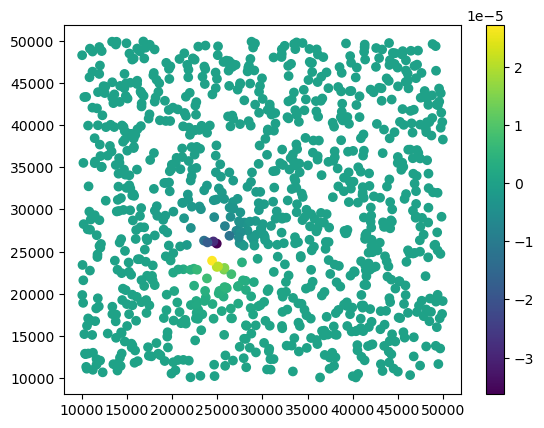

In [9]:
plt.scatter(x,y,c=data )
plt.colorbar()

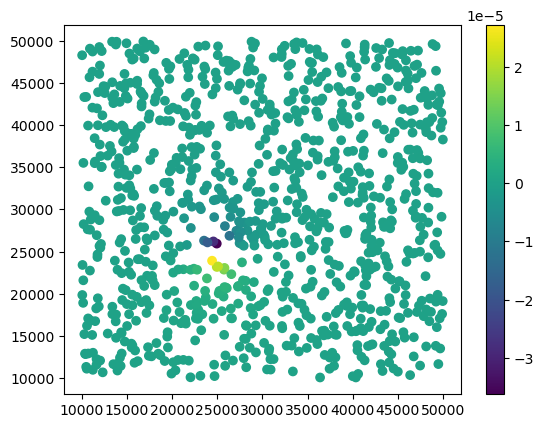

In [10]:
plt.scatter(x,y,c=dados_ruido )
plt.colorbar()

In [11]:
print(dados_ruido)

[ 1.18968352e-07 -4.14376440e-06  9.35777695e-08  1.57992170e-07
 -1.91926031e-07 -3.70190011e-08 -2.17276617e-07  1.16915596e-08
 -1.62430780e-07 -3.36661584e-06 -8.04716762e-07 -1.57874146e-08
 -1.71205101e-07 -8.63589550e-08  4.07491025e-06  8.28722126e-07
 -4.43995006e-07 -1.86396429e-07  1.62868924e-07 -2.80344500e-07
 -9.39899873e-08 -4.25927221e-07  1.59089192e-08 -1.72422340e-08
 -4.33856285e-08  6.36738527e-07 -2.15611470e-07 -1.07634778e-07
 -2.68287805e-07 -3.24566218e-08 -8.57258586e-08 -1.16979721e-07
 -2.85586747e-06 -1.62060178e-07 -2.20797032e-06 -4.50107061e-07
  6.81819816e-08 -1.59471027e-06 -8.96356549e-07  2.84656037e-07
  7.49255523e-07 -1.45098276e-07 -2.32688282e-07 -7.17103044e-07
  8.18970166e-08  1.39366750e-10  1.93636260e-06 -3.19522968e-07
 -1.24962114e-07  4.75882160e-07 -4.71069639e-07  1.90482854e-07
  5.45694692e-08  3.12614272e-07  1.94771756e-07 -1.53927747e-07
 -2.34852307e-07  5.87996824e-07 -3.96289392e-07 -3.45229484e-07
 -1.85349282e-07 -9.00746

In [12]:
escala = np.max(np.abs(A))
plt.imshow(A, vmin=-escala, vmax=escala, cmap="RdBu_r", aspect="auto")
plt.colorbar()
plt.show()

KeyboardInterrupt: 

In [ ]:
H = A.T@A
H

array([[ 4.61178630e-17, -8.14594707e-18, -6.79007133e-18,
         2.03702140e-17],
       [-8.14594707e-18,  3.04381336e-17,  4.19528609e-19,
        -1.25858584e-18],
       [-6.79007133e-18,  4.19528609e-19,  4.84708564e-17,
        -1.45412569e-16],
       [ 2.03702140e-17, -1.25858584e-18, -1.45412569e-16,
         4.36237709e-16]])

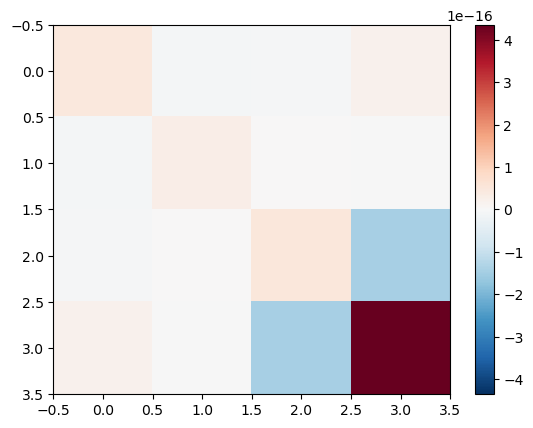

In [ ]:
escala = np.max(np.abs(H))
plt.imshow(H, vmin=-escala, vmax=escala, cmap="RdBu_r", aspect="auto")
plt.colorbar()
plt.show()

In [ ]:
d = np.diagonal(H)
R = np.diag(1/np.abs(d))
